In [1]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data               
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

/var/folders/ws/fygh4lvs7f1f0qdwysntrxch0000gn/T/ipykernel_68858/86021575.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
/var/folders/ws/fygh4lvs7f1f0qdwysntrxch0000gn/T/ipykernel_68858/86021575.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
/var/folders/ws/fygh4lvs7f1f0qdwysntrxch0000gn/T/ipykernel_68858/86021575.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals

Done Combining the training data


/var/folders/ws/fygh4lvs7f1f0qdwysntrxch0000gn/T/ipykernel_68858/86021575.py:90: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
/var/folders/ws/fygh4lvs7f1f0qdwysntrxch0000gn/T/ipykernel_68858/86021575.py:91: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
/var/folders/ws/fygh4lvs7f1f0qdwysntrxch0000gn/T/ipykernel_68858/86021575.py:92: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","to

Done Combining the testing data
Done Combining the data


In [5]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


## Task 1

### Q1

In [8]:
X_train

array([[[ 1.19648   , -0.1606898 , -0.740178  ],
        [ 1.22203   , -0.2672951 , -0.7717485 ],
        [ 1.22311   , -0.4338634 , -0.7678422 ],
        ...,
        [ 0.4974957 , -0.2795907 , -0.2029592 ],
        [ 0.5064167 , -0.286091  , -0.2564634 ],
        [ 0.5609918 , -0.302237  , -0.2553743 ]],

       [[ 0.253887  ,  0.6446213 ,  0.7305601 ],
        [ 0.2547409 ,  0.6470096 ,  0.7330282 ],
        [ 0.256914  ,  0.6468081 ,  0.7354798 ],
        ...,
        [ 0.2489302 ,  0.642803  ,  0.7323693 ],
        [ 0.2503708 ,  0.6447095 ,  0.7369245 ],
        [ 0.2513104 ,  0.6440663 ,  0.735841  ]],

       [[ 0.9736077 , -0.1844755 , -0.2821974 ],
        [ 0.9760866 , -0.1867793 , -0.2848794 ],
        [ 0.977865  , -0.191836  , -0.2891687 ],
        ...,
        [ 0.9779202 , -0.1834941 , -0.2829651 ],
        [ 0.9796224 , -0.1832831 , -0.279844  ],
        [ 0.9775468 , -0.1833646 , -0.2764387 ]],

       ...,

       [[ 0.1943966 ,  0.5317094 ,  0.834933  ],
        [ 0

In [9]:
y_train

array([2, 6, 5, 2, 2, 2, 1, 1, 5, 4, 1, 4, 1, 1, 6, 2, 3, 1, 1, 4, 3, 3,
       5, 6, 5, 1, 3, 6, 4, 5, 5, 2, 5, 1, 1, 6, 4, 3, 3, 3, 3, 4, 6, 3,
       4, 1, 2, 2, 6, 5, 5, 3, 6, 6, 4, 3, 4, 2, 4, 5, 5, 5, 5, 4, 6, 6,
       4, 5, 3, 4, 3, 1, 4, 4, 3, 1, 5, 2, 3, 6, 1, 4, 2, 2, 5, 2, 1, 3,
       6, 6, 2, 5, 6, 1, 3, 5, 2, 3, 4, 4, 2, 5, 1, 1, 1, 3, 4, 5, 6, 1,
       3, 6, 5, 4, 2, 2, 6, 2, 6, 6, 3, 1, 4, 6, 2, 2])

In [10]:
y_train.shape

(126,)

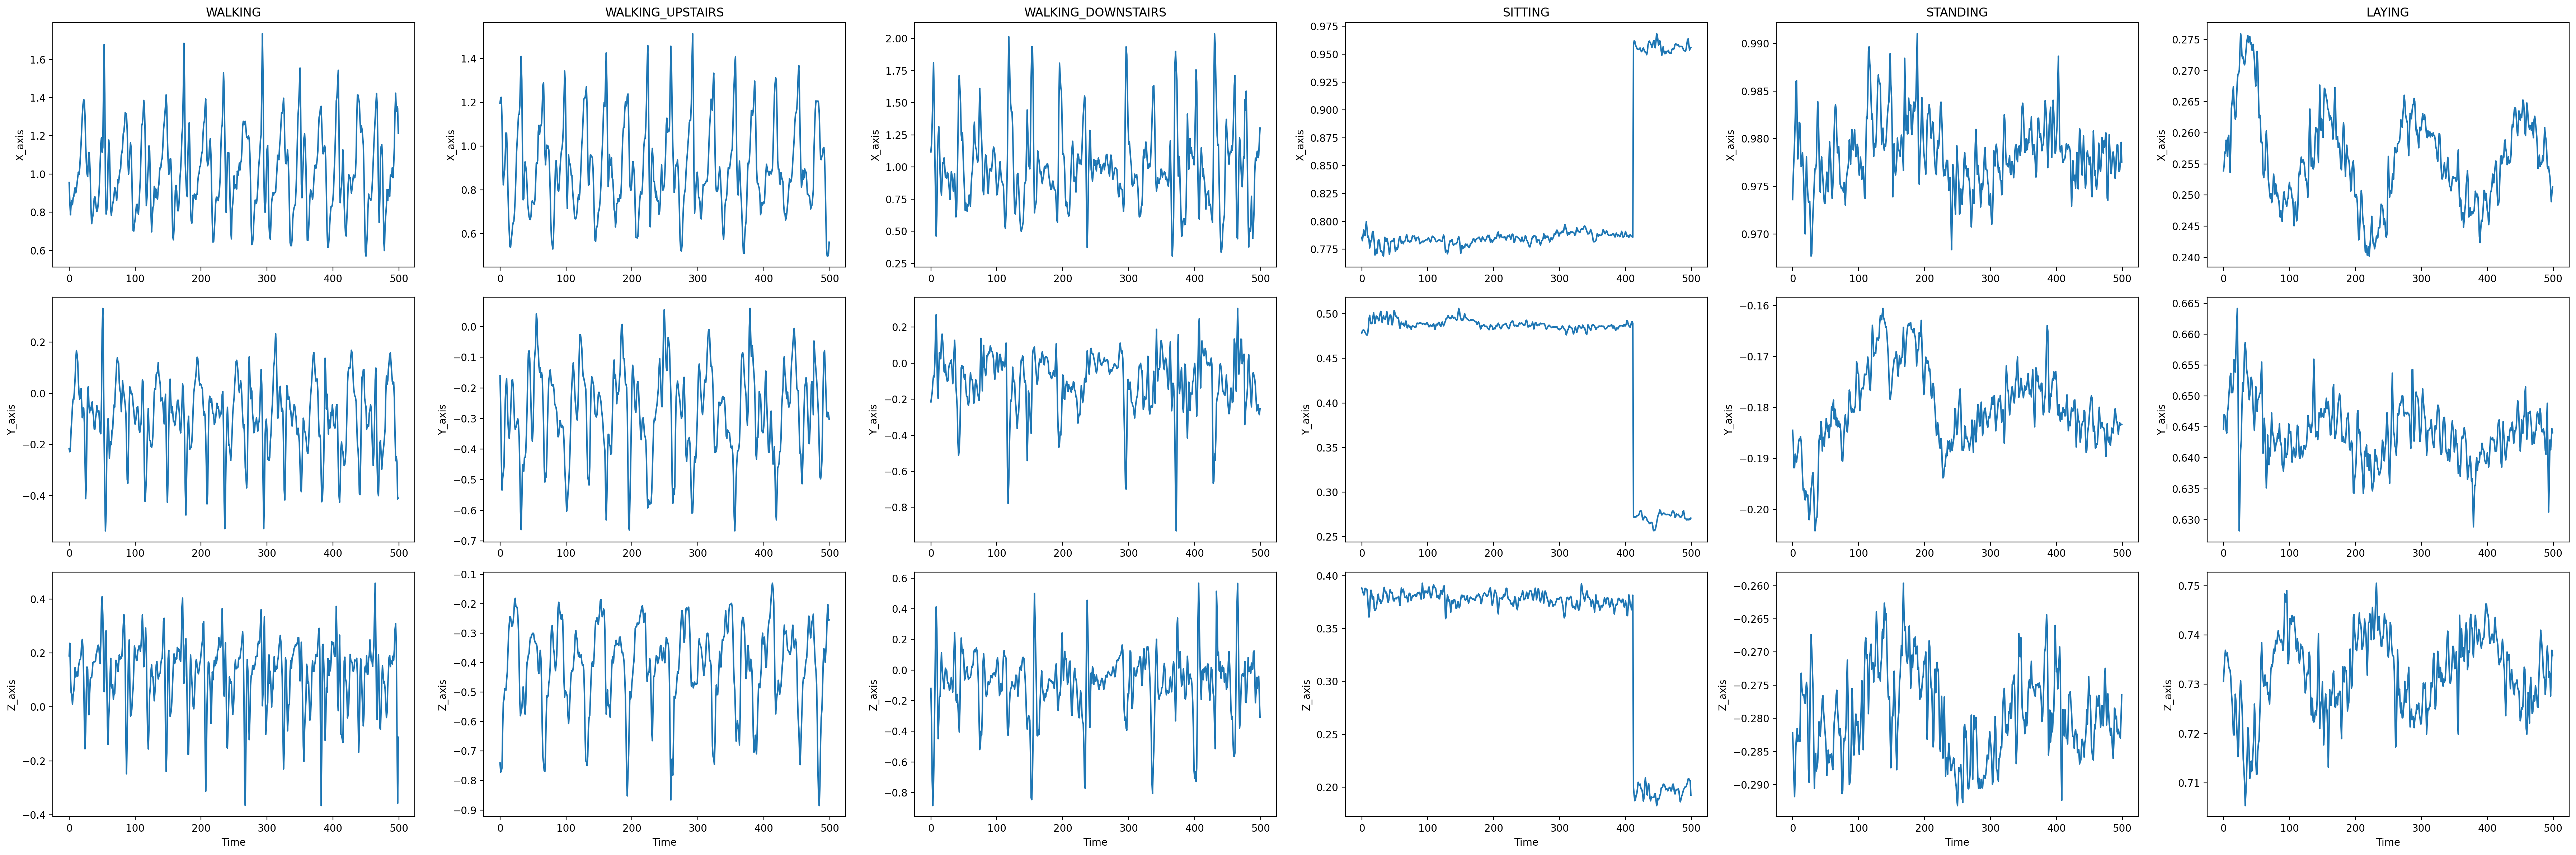

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Extracting unique values in lable column
unique_classes = np.unique(y_train)

class_names = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

samples = {}
for activity in unique_classes:
    index = np.where(y_train == activity)[0][0]    # selecting the first index 
    samples[activity] = X_train[index]


fig, axes = plt.subplots(3, len(unique_classes), figsize=(36, 12)) #3 rows (for X, Y, Z directions) and 6 columns (for each activity class)
for i, activity in enumerate(unique_classes):
    sample = samples[activity]
    
    # Plot for X-axis
    axes[0, i].plot(sample[:, 0])
    axes[0, i].set_title(class_names[activity])
    axes[0, i].set_ylabel('X_axis')
    
    # Plot for Y-axis 
    axes[1, i].plot(sample[:, 1])
    axes[1, i].set_ylabel('Y_axis')
    
    # Plot for Z-axis 
    axes[2, i].plot(sample[:, 2])
    axes[2, i].set_ylabel('Z_axis')
    axes[2, i].set_xlabel('Time')

plt.tight_layout()
plt.show()


The difference in the activities can be seen from the graphs as the wavefroms for different activities differ in terms of shape of the waveform, the height and the spread of the peaks of the graph. Walking, Walking upwards and downwards, can be distinguished from static activities like as sitting, standing, and lying because these activities have multiple frequent  high rising peaks in their waveforms, each with a different breadth and height. But For these static activities, the waveform is fairly smooth not having very frequent drastic peaks.

If we talk about using Decision tree model on this data, it's effectiveness largely hinges on the use of feature extraction. If raw time series data is used without extracting features, the decision tree may struggle because it views individual samples separately. This method is less reliable since small variations in the data can lead to different sample values. Using feature extraction, such as calculating the mean or variance of acceleration data, enhances the model’s ability to differentiate between dynamic and static activities. However, for distinguishing between similar static activities, additional methods or advanced techniques may be needed for precise classification of these activities.


### Q2

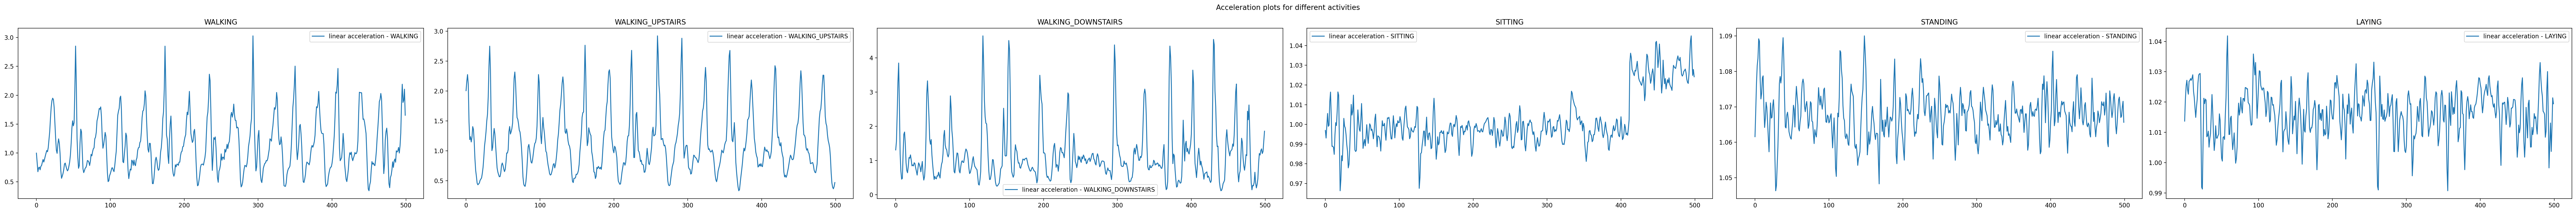

In [15]:
fig, axes = plt.subplots(1, len(unique_classes), figsize=(60, 5))
fig.suptitle('Acceleration plots for different activities')

# Calculate the magnitude of the acceleration for each sample and time step
acc_magnitude = X_train[:,:,0]**2 + X_train[:,:,1]**2 + X_train[:,:,2]**2     # for training set
acc_magnitude_test = X_test[:,:,0]**2 + X_test[:,:,1]**2 + X_test[:,:,2]**2   # for testing set


# Plotting
for activity in unique_classes:
    index = np.where(y_train == activity)[0][0] # selecting the sample with first index
    acceleration_data = acc_magnitude[index]
    col = activity - 1
    axes[col].plot(acceleration_data, label=f'{"linear acceleration"} - {class_names[activity]}')
    axes[col].set_title(class_names[activity])
    axes[col].legend()

plt.tight_layout()
plt.show()


We can visually differentiate between static and dynamic activities by examining the plot of their linear acceleration, focusing on aspects like the waveform, maximum and minimum values, and the range of values in which they are lying. Therefore, it’s possible to use simple conditional statements and manually define the conditions. However, if we train a decision tree using features derived from linear acceleration data, it will effectively distinguish between static and dynamic activities.

### Q3

##### PCA (Principal Component Analysis) on Total Acceleration

Shape of the data after PCA: (126, 2)


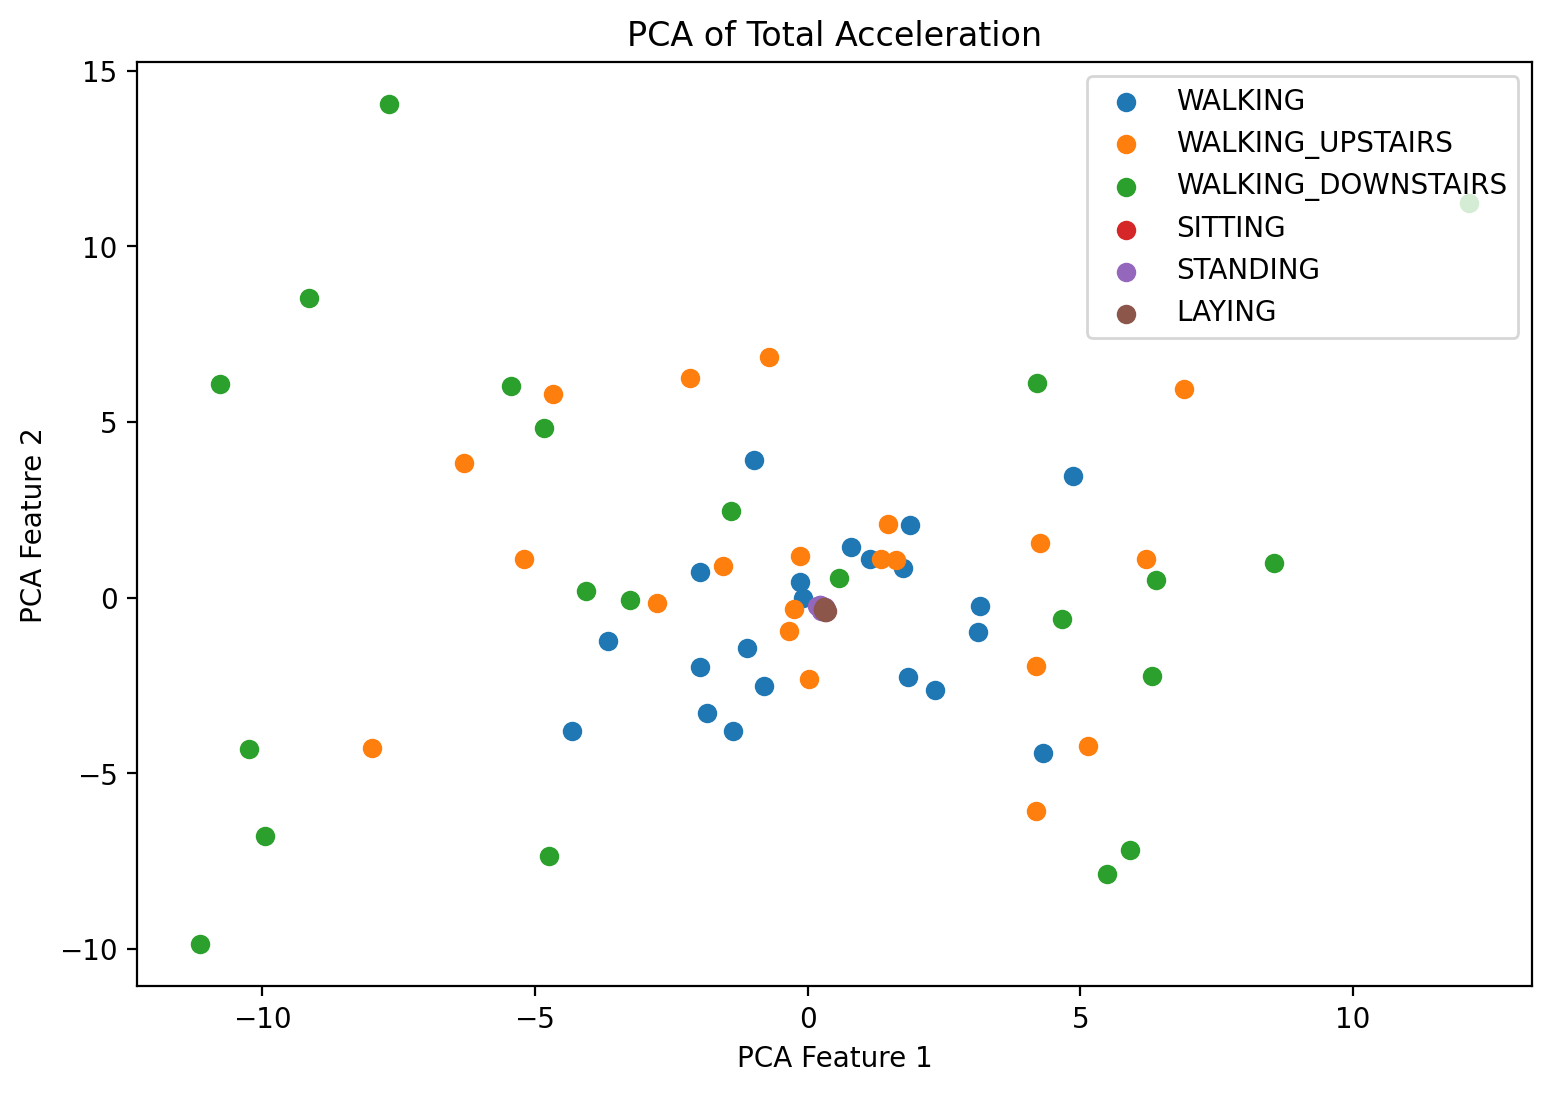

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(acc_magnitude)  
print("Shape of the data after PCA:", X_pca.shape)

# plotting
plt.figure(figsize=(9, 6))
for activity in unique_classes:
    indices = np.where(y_train == activity)[0]
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'{class_names[activity]}')

plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('PCA of Total Acceleration')
plt.legend(loc='upper right')
plt.show()


##### PCA using TSFEL features

In [21]:
!pip install tsfel

Shape of training data: (126, 7)
Shape of testing data: (54, 7)
Shape of the data after PCA: (126, 2)


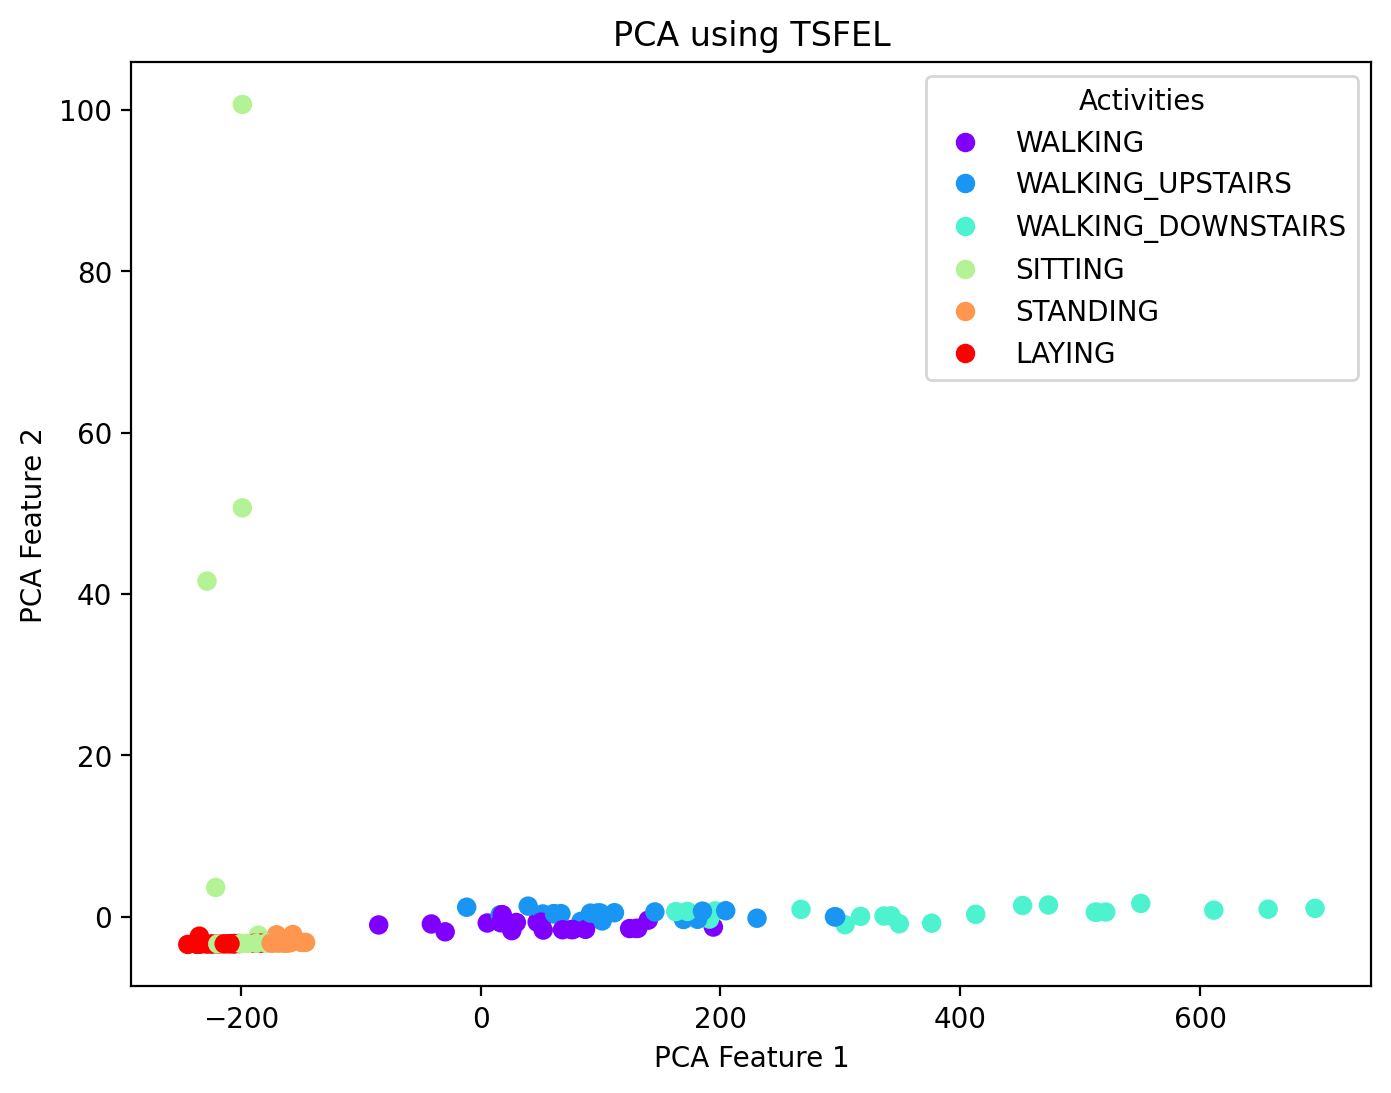

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tsfel

# The features picked are: absolute energy, mean absolute deviation, peak to peak distance, rms, autocorrelation, variance, and mean.
# for training set
X_tsf_train = [] 
for i in range(len(acc_magnitude)):
    l = []
    l.append(tsfel.feature_extraction.features.abs_energy(acc_magnitude[i]))
    l.append(tsfel.feature_extraction.features.mean_abs_deviation(acc_magnitude[i]))
    l.append(tsfel.feature_extraction.features.pk_pk_distance(acc_magnitude[i]))
    l.append(tsfel.feature_extraction.features.rms(acc_magnitude[i]))
    l.append(tsfel.feature_extraction.features.autocorr(acc_magnitude[i]))
    l.append(tsfel.feature_extraction.features.calc_var(acc_magnitude[i]))
    l.append(tsfel.feature_extraction.features.calc_mean(acc_magnitude[i]))
    X_tsf_train.append(np.array(l))
# creating training dataset
X_tsf_train= np.array(X_tsf_train)
print("Shape of training data:",X_tsf_train.shape)

# for test set
X_tsf_test = []
for i in range(len(acc_magnitude_test)):
    l = []
    l.append(tsfel.feature_extraction.features.abs_energy(acc_magnitude_test[i]))
    l.append(tsfel.feature_extraction.features.mean_abs_deviation(acc_magnitude_test[i]))
    l.append(tsfel.feature_extraction.features.pk_pk_distance(acc_magnitude_test[i]))
    l.append(tsfel.feature_extraction.features.rms(acc_magnitude_test[i]))
    l.append(tsfel.feature_extraction.features.autocorr(acc_magnitude_test[i]))
    l.append(tsfel.feature_extraction.features.calc_var(acc_magnitude_test[i]))
    l.append(tsfel.feature_extraction.features.calc_mean(acc_magnitude_test[i]))
    X_tsf_test.append(np.array(l))
# creating testing data
X_tsf_test= np.array(X_tsf_test)
print("Shape of testing data:",X_tsf_test.shape)

# Apply PCA on tsfel training set
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_tsf_train)
print("Shape of the data after PCA:",X_pca_train.shape)

# Plotting
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_train, cmap='rainbow')
legend_labels = [f'{class_names[i]}' for i in set(y_train)]
legend_elements = scatter.legend_elements()[0]
legend = plt.legend(legend_elements, legend_labels, title='Activities')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('PCA using TSFEL')
plt.show()


##### PCA using features provided by the dataset

In [24]:
import pandas as pd

# Read the file
with open('./UCI HAR Dataset/features.txt', 'r') as file:
    features = file.readlines()

# Remove any leading/trailing whitespace characters like `\n`
features = [feature.strip() for feature in features]

# Load the file
file_path = './UCI HAR Dataset/train/X_train.txt'

# Read the entire content of the file
with open(file_path, 'r') as file:
    content = file.read()

# Split the content into a list of elements
elements = content.split()

# Ensure the total number of elements is a multiple of 561
assert len(elements) % 561 == 0, "The number of elements is not a multiple of 561!"

# Split the elements into chunks of 561
chunks = [elements[i:i + 561] for i in range(0, len(elements), 561)]

# Convert the chunks into a DataFrame, creating training set 
X_data_feature_train= pd.DataFrame(chunks)
X_data_feature_train.columns = features
X_data_feature_train.shape




(7352, 561)

In [25]:
import pandas as pd

# Read the file
with open('./UCI HAR Dataset/features.txt', 'r') as file:
    features = file.readlines()

# Remove any leading/trailing whitespace characters like `\n`
features = [feature.strip() for feature in features]

# Load the file
file_path = './UCI HAR Dataset/test/X_test.txt'

# Read the entire content of the file
with open(file_path, 'r') as file:
    content = file.read()

# Split the content into a list of elements
elements = content.split()

# Ensure the total number of elements is a multiple of 561
assert len(elements) % 561 == 0, "The number of elements is not a multiple of 561!"

# Split the elements into chunks of 561
chunks = [elements[i:i + 561] for i in range(0, len(elements), 561)]

# Convert the chunks into a DataFrame, creating test dataset
X_data_feature_test= pd.DataFrame(chunks)
X_data_feature_test.columns = features
X_data_feature_test.shape

(2947, 561)

In [26]:
# Loading y_train dataset
y_data_feature_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt', header=None)
y_data_feature_train.columns = ['Activity']
y_data_feature_train.head()

Activity
0         5
1         5
2         5
3         5
4         5

In [27]:
# Loading y_test dataset
y_data_feature_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt', header=None)
y_data_feature_test.columns = ['Activity']
y_data_feature_test.head()

Activity
0         5
1         5
2         5
3         5
4         5

Shape of the data after PCA: (7352, 2)


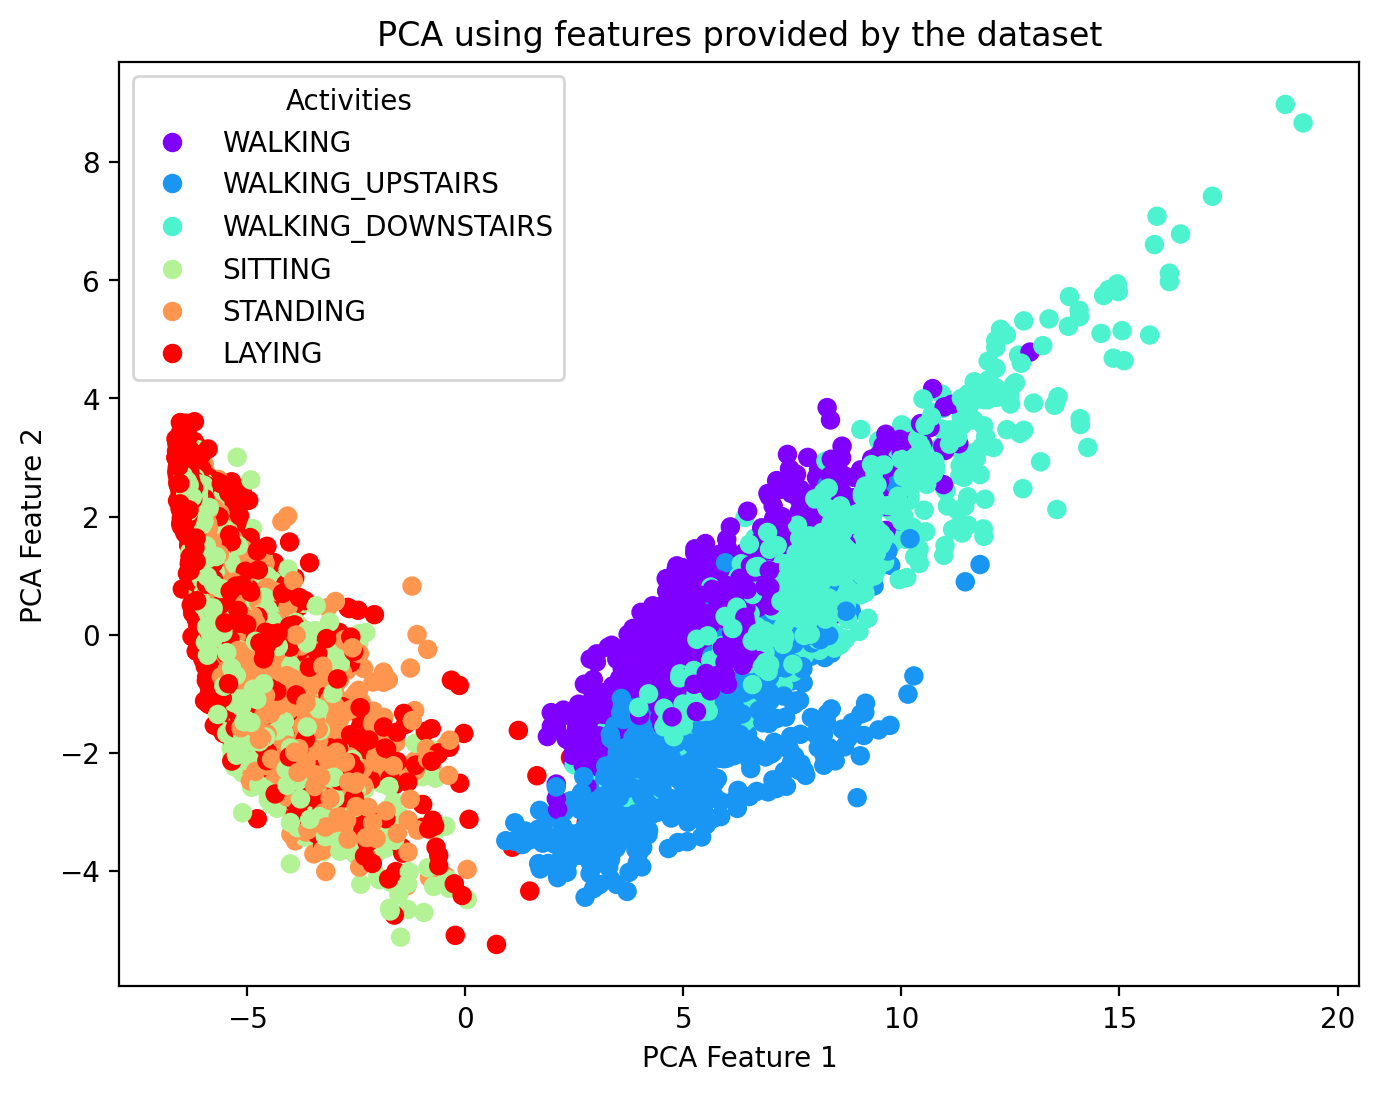

In [28]:
# Apply PCA 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_data_feature_pca_train = pca.fit_transform(X_data_feature_train)
print("Shape of the data after PCA:", X_data_feature_pca_train.shape)

# Convert y_data_feature_train to a 1D array using .ravel()
y_data_feature_train_array = y_data_feature_train.values.ravel()

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_data_feature_pca_train[:, 0], X_data_feature_pca_train[:, 1], c=y_data_feature_train_array, cmap='rainbow')

# Creating the legend
legend_labels = [f'{class_names[i]}' for i in set(y_data_feature_train_array)]
legend_elements = scatter.legend_elements()[0]
legend = plt.legend(legend_elements, legend_labels, title='Activities')

plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('PCA using features provided by the dataset')
plt.show()


##### Compare the results of PCA on Total Acceleration, TSFEL and the dataset features

On comparing the three graphs obtained as a result of performing PCA, we can see that the result obtained by performing PCA using features extracted from the dataset is best as it is very easily classifying the static and dynamic activites and further among the dynamic activities also it is able to classify the individual activities. Whereas the result obtained on perfrorming PCA on Total Acceleration, TSFEL are not classyfying the activities properly. The graph obtained on perfroming PCA on Total Acceleration is not at all classifying activities as the data points are spread all across. On the other hand the graph obtained from perfroming PCA on TSFEL is somewhat classifying the static activities with the dynamic ones but we can't really distinguish any particular activity among the static or dynamic class. 

### Q4

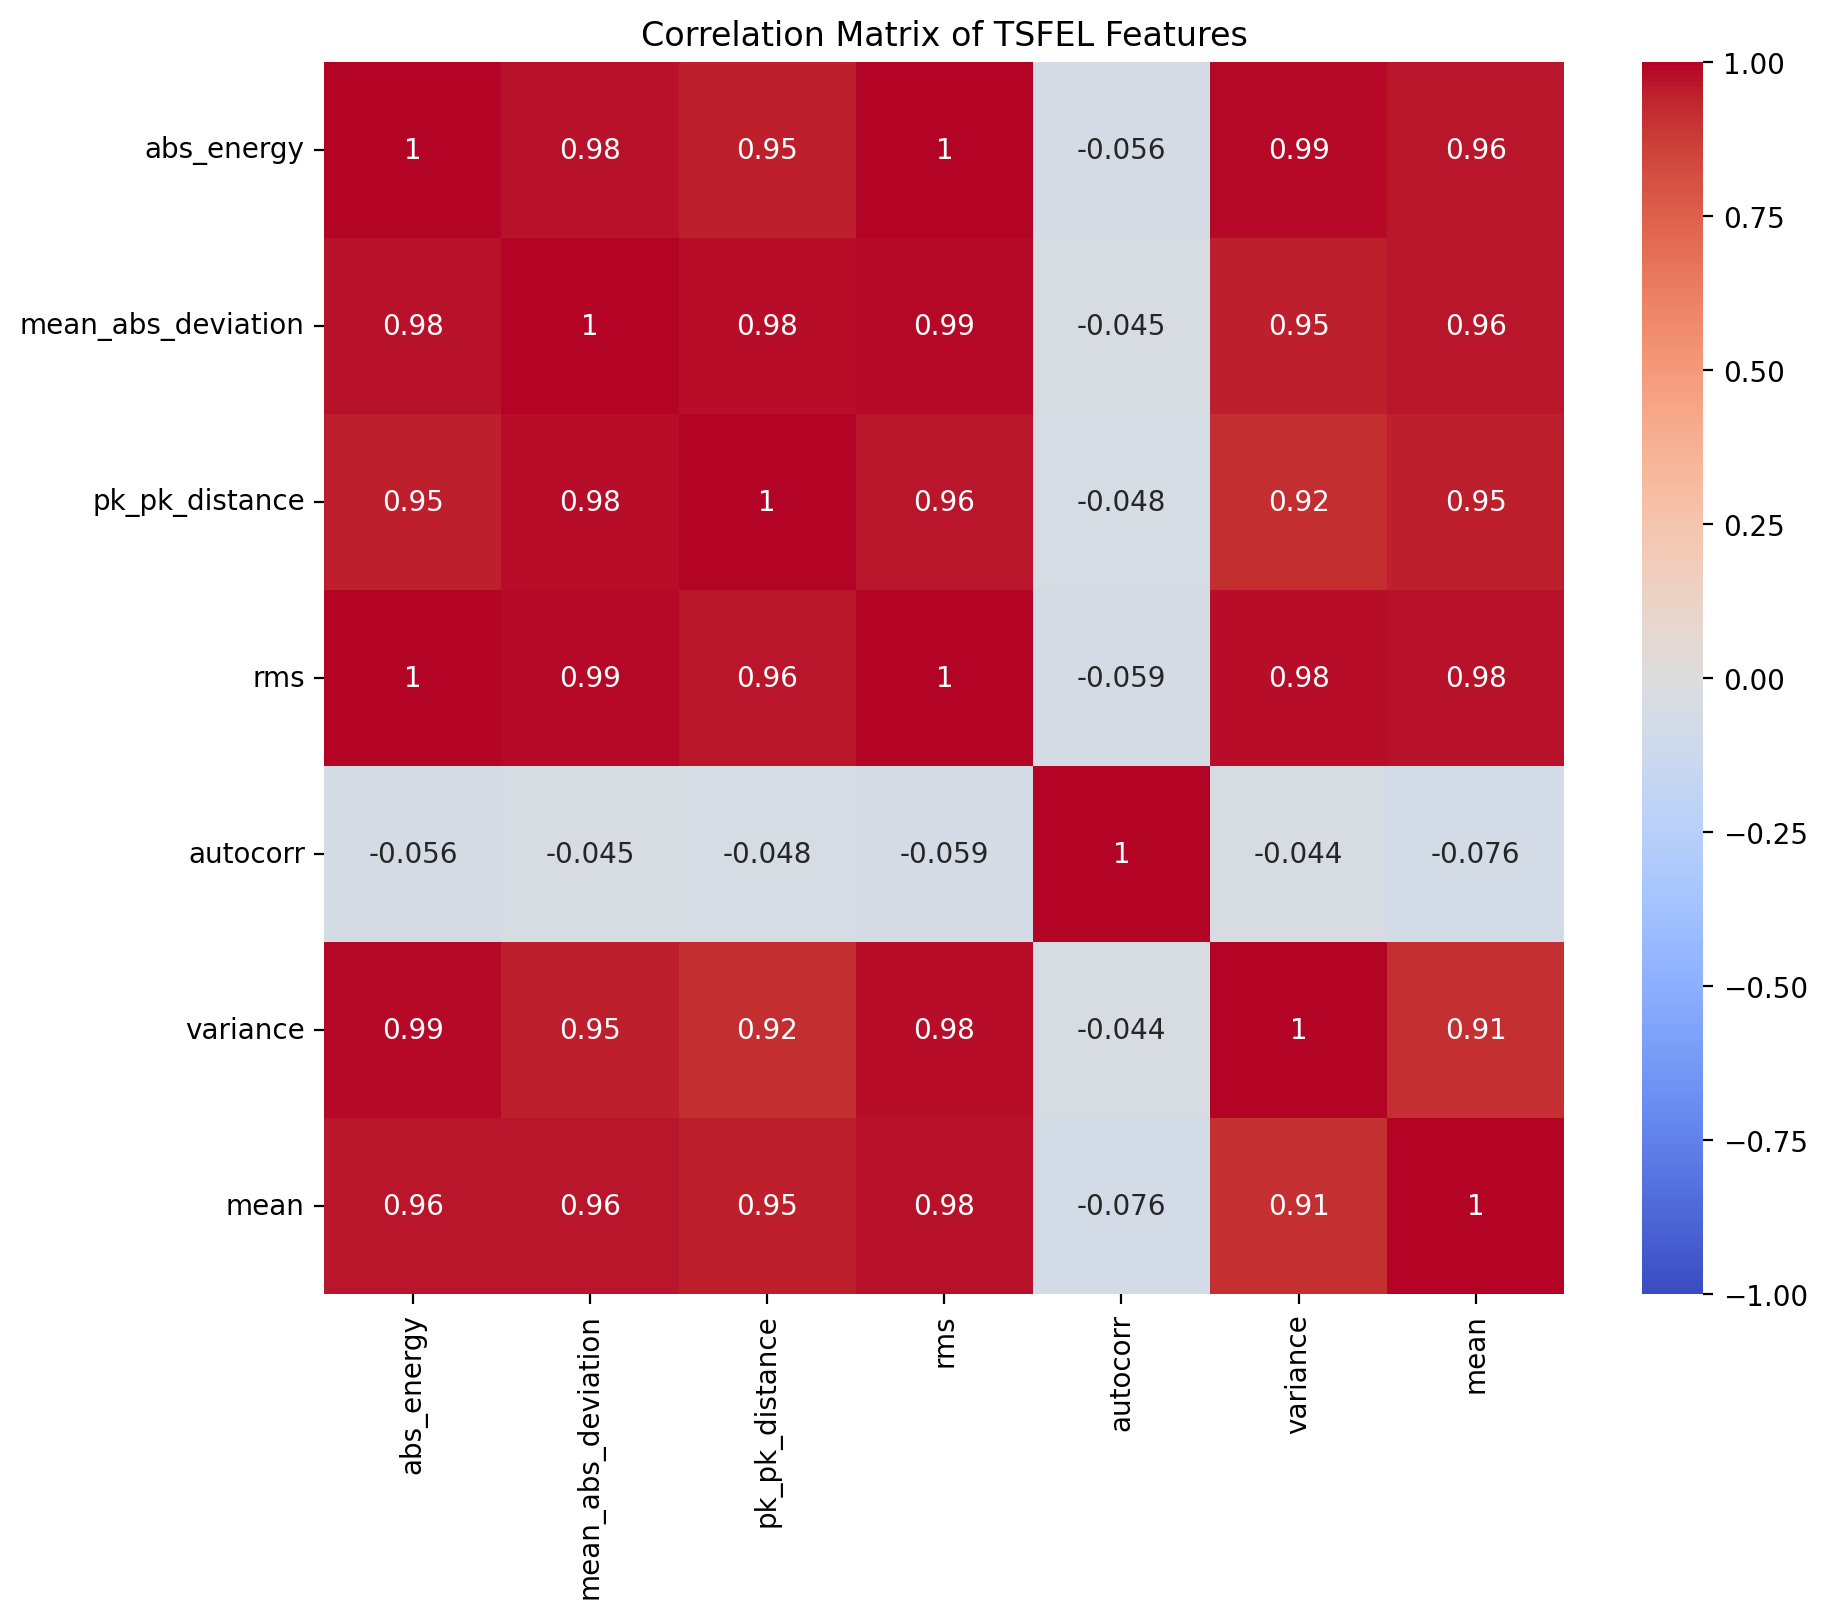

Highly Correlated Features:
{'pk_pk_distance', 'mean_abs_deviation', 'abs_energy', 'mean', 'variance', 'rms'}


In [144]:
# correlation matrix of the features obtained by TSFEL

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feature_names = ['abs_energy', 'mean_abs_deviation', 'pk_pk_distance', 'rms', 'autocorr', 'variance', 'mean']
X_tsf_train_df = pd.DataFrame(X_tsf_train, columns=feature_names) # creating a dataframe 

# creating correlation matrix
correlation_matrix = X_tsf_train_df.corr()

# plotting 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of TSFEL Features')
plt.show()

# Identify highly correlated features (e.g., with correlation > 0.9 or < -0.9)
high_correlation_threshold = 0.9
col_corr = set()  # creating a set so that there will be no repetition of features names

# iterating all over the matrix to get the columns
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_correlation_threshold: # checking the condition 
            col_name_i = correlation_matrix.columns[i]   
            col_name_j = correlation_matrix.columns[j]
            col_corr.add(col_name_i)
            col_corr.add(col_name_j)

print("Highly Correlated Features:")
print(col_corr)


Redundant features are those that are highly correlated with each other, meaning they provide similar or overlapping information. 
Since rms has a correlation of 1.00 with abs_energy, it suggests that abs_energy and rms provide the same information. One of these can be considered redundant by checking their correlation with the traget variable. Also remaining other highly correlated features can also be considered reduntant by ckecking their correlation with the traget variable. The ones less correlated with target variable will be considered redundant.

In [158]:
# Finding redundant features
# calculate correlation of highly correlated features with target varibel
import pandas as pd

# Convert y_train to a pandas Series if it isn't already
if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)

selected_columns = ['pk_pk_distance', 'mean_abs_deviation', 'abs_energy', 'mean', 'variance', 'rms']  # highly correlated features

# Calculate the correlation of the selected features with the target variable
correlation_with_target = X_tsf_train_df[selected_columns].corrwith(y_train)

# creating a dataframe from the matrix and sorting in descending order
correlation_with_target_df = pd.DataFrame({
    'Correlation': correlation_with_target
}).sort_values(by='Correlation', ascending=False)

print(correlation_with_target_df)


                    Correlation
variance              -0.497680
abs_energy            -0.587253
rms                   -0.630845
mean_abs_deviation    -0.702535
pk_pk_distance        -0.713230
mean                  -0.722664


So redundant features would be: abs_energy, variance as they are very less correlated with the target variable. 

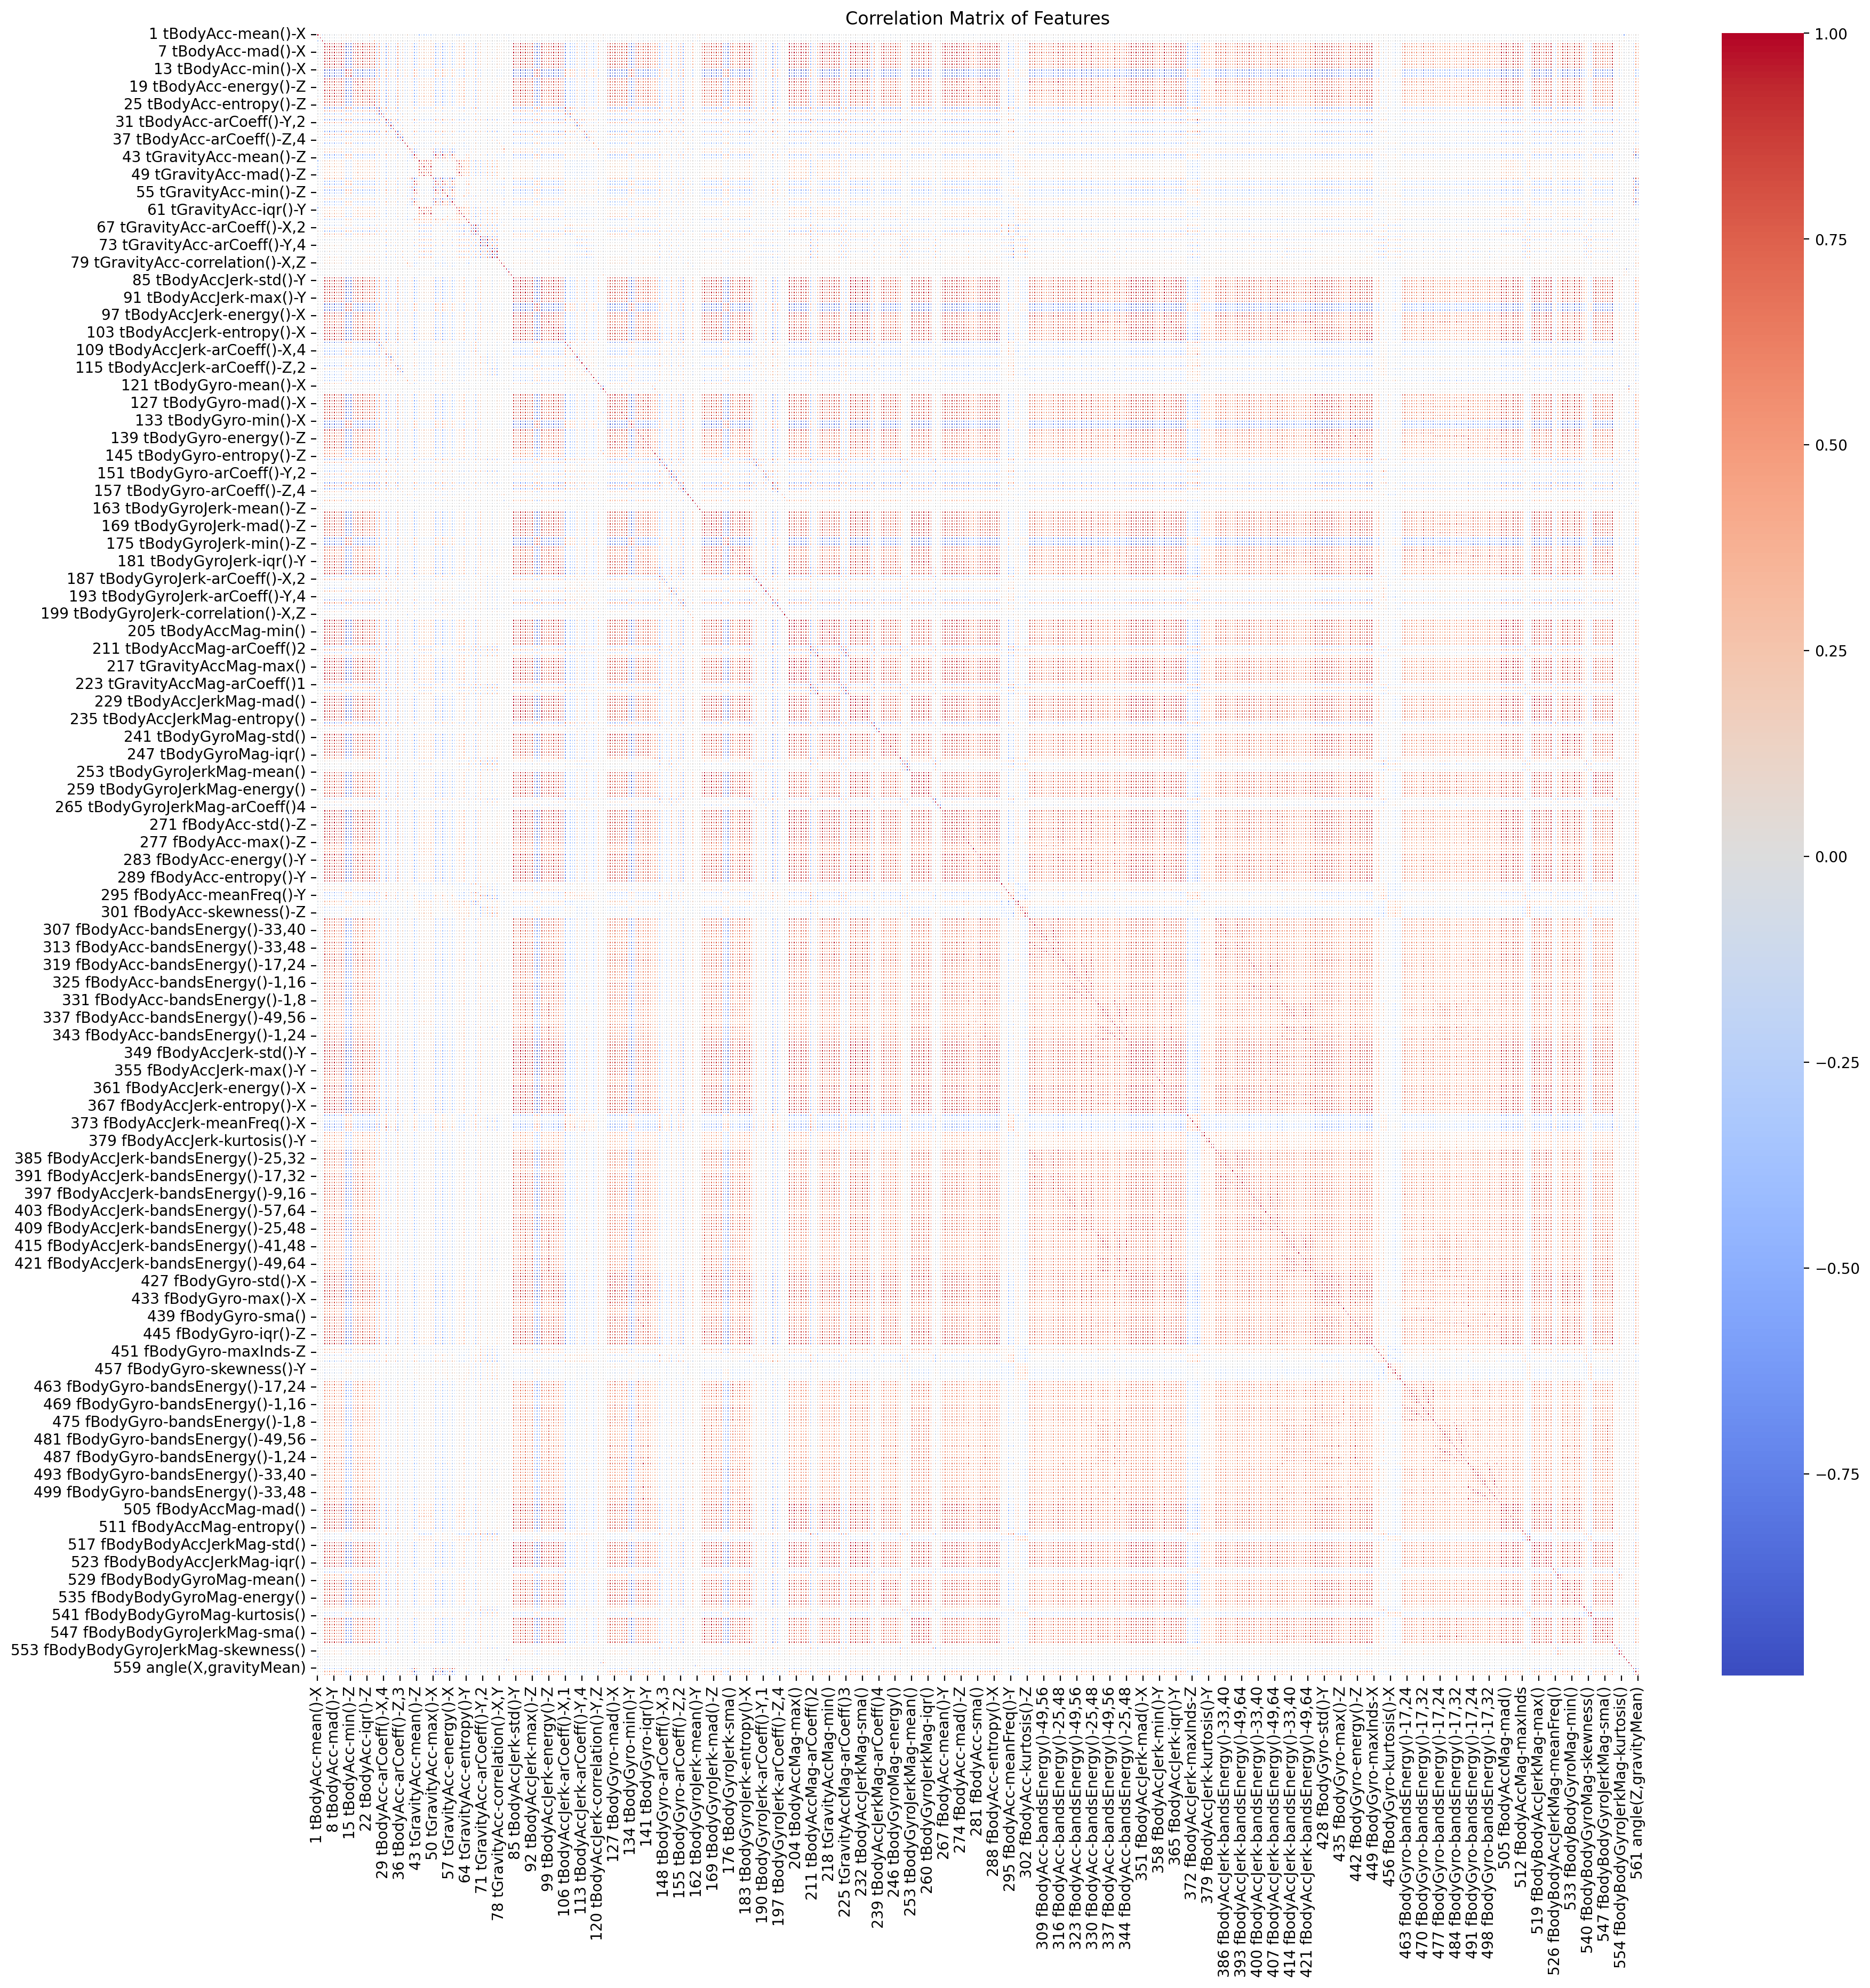

Highly Correlated Features:
{'547 fBodyBodyGyroJerkMag-sma()', '202 tBodyAccMag-std()', '204 tBodyAccMag-max()', '501 fBodyGyro-bandsEnergy()-1,24', '96 tBodyAccJerk-sma()', '98 tBodyAccJerk-energy()-Y', '214 tGravityAccMag-mean()', '521 fBodyBodyAccJerkMag-sma()', '223 tGravityAccMag-arCoeff()1', '99 tBodyAccJerk-energy()-Z', '282 fBodyAcc-energy()-X', '17 tBodyAcc-energy()-X', '534 fBodyBodyGyroMag-sma()', '473 fBodyGyro-bandsEnergy()-1,24', '208 tBodyAccMag-iqr()', '221 tGravityAccMag-iqr()', '138 tBodyGyro-energy()-Y', '97 tBodyAccJerk-energy()-X', '503 fBodyAccMag-mean()', '542 fBodyBodyGyroJerkMag-mean()', '283 fBodyAcc-energy()-Y', '329 fBodyAcc-bandsEnergy()-1,24', '253 tBodyGyroJerkMag-mean()', '201 tBodyAccMag-mean()', '16 tBodyAcc-sma()', '219 tGravityAccMag-sma()', '215 tGravityAccMag-std()', '209 tBodyAccMag-entropy()', '227 tBodyAccJerkMag-mean()', '211 tBodyAccMag-arCoeff()2', '207 tBodyAccMag-energy()', '226 tGravityAccMag-arCoeff()4', '529 fBodyBodyGyroMag-mean()', '21

In [173]:
# correlation matrix of the features provided in the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# creating correlation matrix
correlation_matrix_data = X_data_feature_train.corr()

# Plotting
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_data, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Identify highly correlated features
threshold = 0.999
col_corr = set()  # creating a set so that there will be no repetition of features names

# iterating all over the matrix to get the columns
for i in range(len(correlation_matrix_data.columns)):
    for j in range(i):
        if abs(correlation_matrix_data.iloc[i, j]) > threshold: # checking the condition 
            col_name_i = correlation_matrix_data.columns[i]   
            col_name_j = correlation_matrix_data.columns[j]
            col_corr.add(col_name_i)
            col_corr.add(col_name_j)

print("Highly Correlated Features:")
print(col_corr)

In [175]:
len(col_corr) # no. of correlated features 

60

In [245]:
# Finding redundant features
# calculate correlation of highly correlated features with target variable
import pandas as pd
import numpy as np

# Converting y_data_feature_train to a pandas Series if it's a single-column DataFrame
if isinstance(y_data_feature_train, pd.DataFrame) and y_data_feature_train.shape[1] == 1:
    y_data_feature_train = y_data_feature_train.iloc[:, 0]

# Converting X_data_feature_train and y_data_feature_train to numeric data 
y_data_feature_train = pd.to_numeric(y_data_feature_train, errors='coerce')
X_data_feature_train = X_data_feature_train.apply(pd.to_numeric, errors='coerce')

# Highly correlated features
selected_columns = ['547 fBodyBodyGyroJerkMag-sma()', '202 tBodyAccMag-std()', '204 tBodyAccMag-max()', '501 fBodyGyro-bandsEnergy()-1,24', '96 tBodyAccJerk-sma()', '98 tBodyAccJerk-energy()-Y', '214 tGravityAccMag-mean()', '521 fBodyBodyAccJerkMag-sma()', '223 tGravityAccMag-arCoeff()1', '99 tBodyAccJerk-energy()-Z', '282 fBodyAcc-energy()-X', '17 tBodyAcc-energy()-X', '534 fBodyBodyGyroMag-sma()', '473 fBodyGyro-bandsEnergy()-1,24', '208 tBodyAccMag-iqr()', '221 tGravityAccMag-iqr()', '138 tBodyGyro-energy()-Y', '97 tBodyAccJerk-energy()-X', '503 fBodyAccMag-mean()', '542 fBodyBodyGyroJerkMag-mean()', '283 fBodyAcc-energy()-Y', '329 fBodyAcc-bandsEnergy()-1,24', '253 tBodyGyroJerkMag-mean()', '201 tBodyAccMag-mean()', '16 tBodyAcc-sma()', '219 tGravityAccMag-sma()', '215 tGravityAccMag-std()', '209 tBodyAccMag-entropy()', '227 tBodyAccJerkMag-mean()', '211 tBodyAccMag-arCoeff()2', '207 tBodyAccMag-energy()', '226 tGravityAccMag-arCoeff()4', '529 fBodyBodyGyroMag-mean()', '210 tBodyAccMag-arCoeff()1', '362 fBodyAccJerk-energy()-Y', '222 tGravityAccMag-entropy()', '363 fBodyAccJerk-energy()-Z', '245 tBodyGyroMag-sma()', '203 tBodyAccMag-mad()', '206 tBodyAccMag-sma()', '508 fBodyAccMag-sma()', '516 fBodyBodyAccJerkMag-mean()', '225 tGravityAccMag-arCoeff()3', '205 tBodyAccMag-min()', '218 tGravityAccMag-min()', '240 tBodyGyroMag-mean()', '258 tBodyGyroJerkMag-sma()', '213 tBodyAccMag-arCoeff()4', '442 fBodyGyro-energy()-Z', '315 fBodyAcc-bandsEnergy()-1,24', '440 fBodyGyro-energy()-X', '212 tBodyAccMag-arCoeff()3', '217 tGravityAccMag-max()', '216 tGravityAccMag-mad()', '224 tGravityAccMag-arCoeff()2', '441 fBodyGyro-energy()-Y', '232 tBodyAccJerkMag-sma()', '220 tGravityAccMag-energy()', '136 tBodyGyro-sma()', '361 fBodyAccJerk-energy()-X'] 

# Calculate the correlation of the selected features with the target variable
correlation_with_target = X_data_feature_train[selected_columns].corrwith(y_data_feature_train)

# Display correlation with the target
correlation_with_target_df = pd.DataFrame({
    'Correlation': correlation_with_target
}).sort_values(by='Correlation', ascending=False)

print(correlation_with_target_df)


                                  Correlation
210 tBodyAccMag-arCoeff()1           0.350852
223 tGravityAccMag-arCoeff()1        0.350852
225 tGravityAccMag-arCoeff()3        0.302121
212 tBodyAccMag-arCoeff()3           0.302121
226 tGravityAccMag-arCoeff()4       -0.283629
213 tBodyAccMag-arCoeff()4          -0.283629
211 tBodyAccMag-arCoeff()2          -0.361120
224 tGravityAccMag-arCoeff()2       -0.361120
363 fBodyAccJerk-energy()-Z         -0.516473
99 tBodyAccJerk-energy()-Z          -0.516542
17 tBodyAcc-energy()-X              -0.532312
315 fBodyAcc-bandsEnergy()-1,24     -0.532471
282 fBodyAcc-energy()-X             -0.534531
473 fBodyGyro-bandsEnergy()-1,24    -0.541832
440 fBodyGyro-energy()-X            -0.544780
441 fBodyGyro-energy()-Y            -0.568223
138 tBodyGyro-energy()-Y            -0.569751
361 fBodyAccJerk-energy()-X         -0.577441
97 tBodyAccJerk-energy()-X          -0.577458
501 fBodyGyro-bandsEnergy()-1,24    -0.590374
442 fBodyGyro-energy()-Z          

From the above list we can see that among these 60 features, many of the features have same correlation value with target variable so among these features one can be considered as redundant. Also the features that have correlation values with target varibale less than 0.5 can also be considered redundant. 

## Task 2

### Q1

Accuracy: 0.6481481481481481
Precision: 0.6391835016835017
Recall: 0.6481481481481481
Confusion Matrix:
[[7 1 0 0 1 0]
 [1 3 4 0 0 1]
 [3 1 5 0 0 0]
 [0 0 0 5 1 3]
 [0 0 0 0 9 0]
 [0 0 0 3 0 6]]


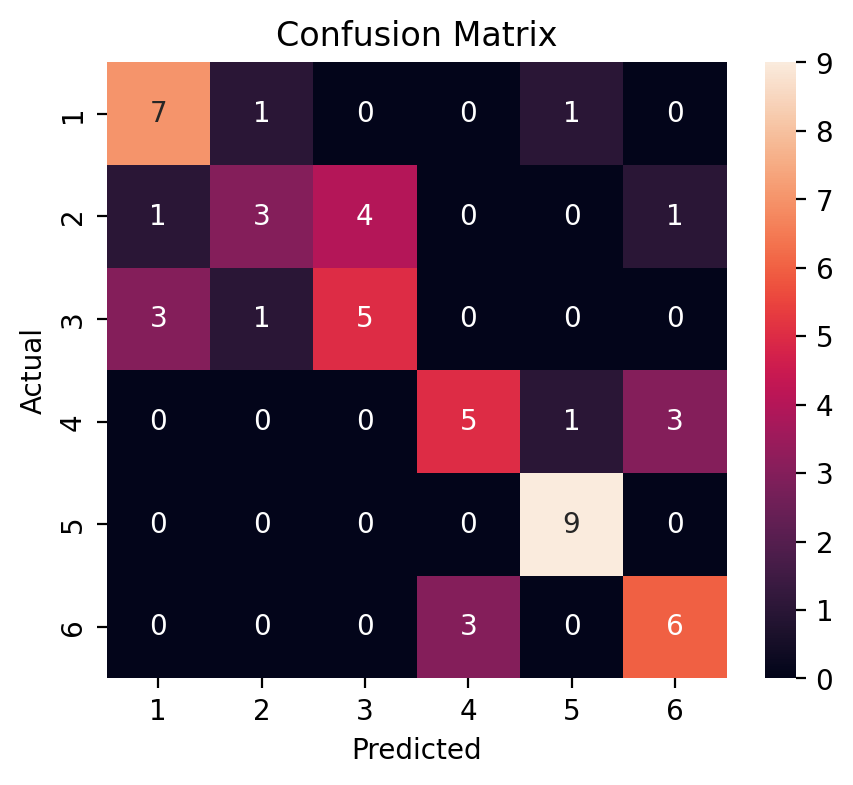

In [280]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

# training the decision tree
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(acc_magnitude, y_train)

# predicitng 
y_pred = dt.predict(acc_magnitude_test)

# calculating different metrics 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average = 'weighted') 
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average = 'weighted')  
print(f'Recall: {recall}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Displaying the confusion matrix 
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.7037037037037037
Precision: 0.698860398860399
Recall: 0.7037037037037037
Confusion Matrix:
[[7 2 0 0 0 0]
 [2 5 2 0 0 0]
 [0 1 8 0 0 0]
 [0 0 0 3 1 5]
 [0 0 0 2 7 0]
 [0 0 0 1 0 8]]


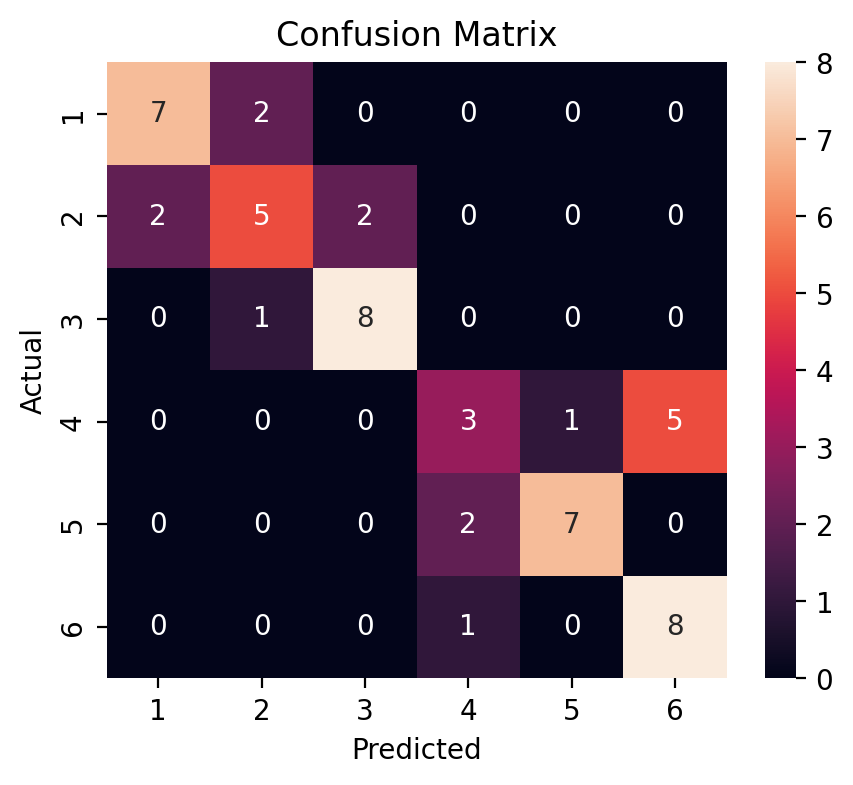

In [282]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

# training the decision tree
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_tsf_train, y_train)

# predicting
y_pred = dt.predict(X_tsf_test)

# calculating different metrics 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average = 'weighted') 
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average = 'weighted')  
print(f'Recall: {recall}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8564642008822532
Precision: 0.8572189289576875
Recall: 0.8564642008822532
Confusion Matrix:
[[459  17  20   0   0   0]
 [ 73 335  62   0   0   1]
 [ 15  46 359   0   0   0]
 [  0   0   0 375 116   0]
 [  0   0   0  73 459   0]
 [  0   0   0   0   0 537]]


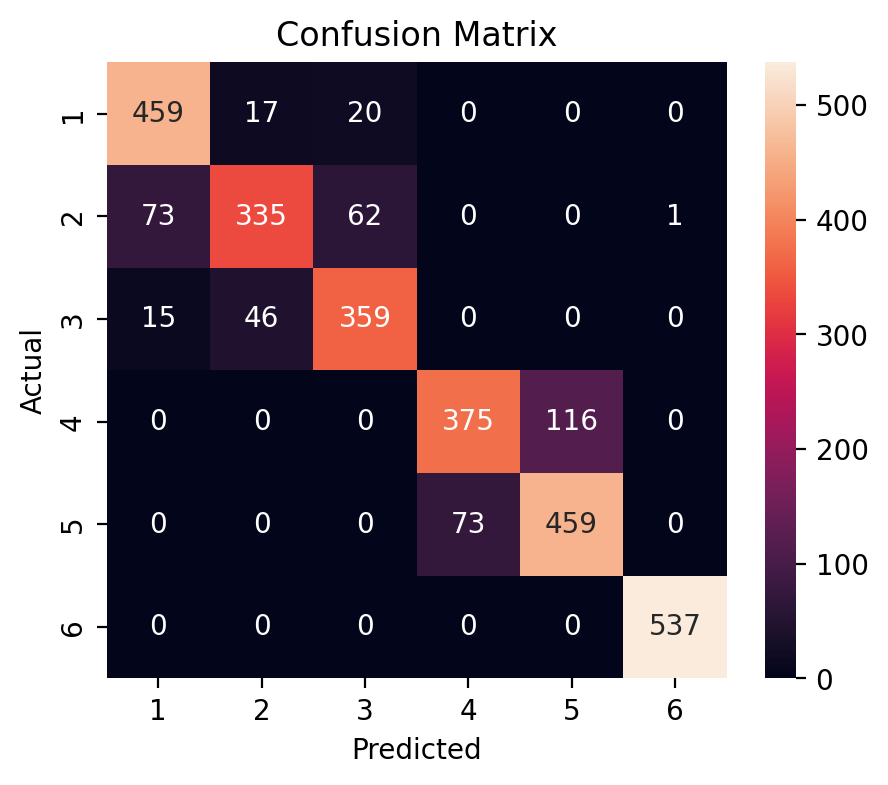

In [284]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

# training the decision tree
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_data_feature_train, y_data_feature_train)

# predicitng
y_pred = dt.predict(X_data_feature_test)

# calculating different metrics 
accuracy = accuracy_score(y_data_feature_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_data_feature_test, y_pred, average = 'weighted') 
print(f'Precision: {precision}')
 
recall = recall_score(y_data_feature_test, y_pred, average = 'weighted')  
print(f'Recall: {recall}')

conf_matrix = confusion_matrix(y_data_feature_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

On comparing the performance metrics of three models, the third model is clearly the best, then the second one and then the first one. The third model is offering the highest accuracy and the most reliable performance across different activities. Its refined feature set allows it to distinguish between similar activities more effectively, making it the superior choice among the three.

### Q2

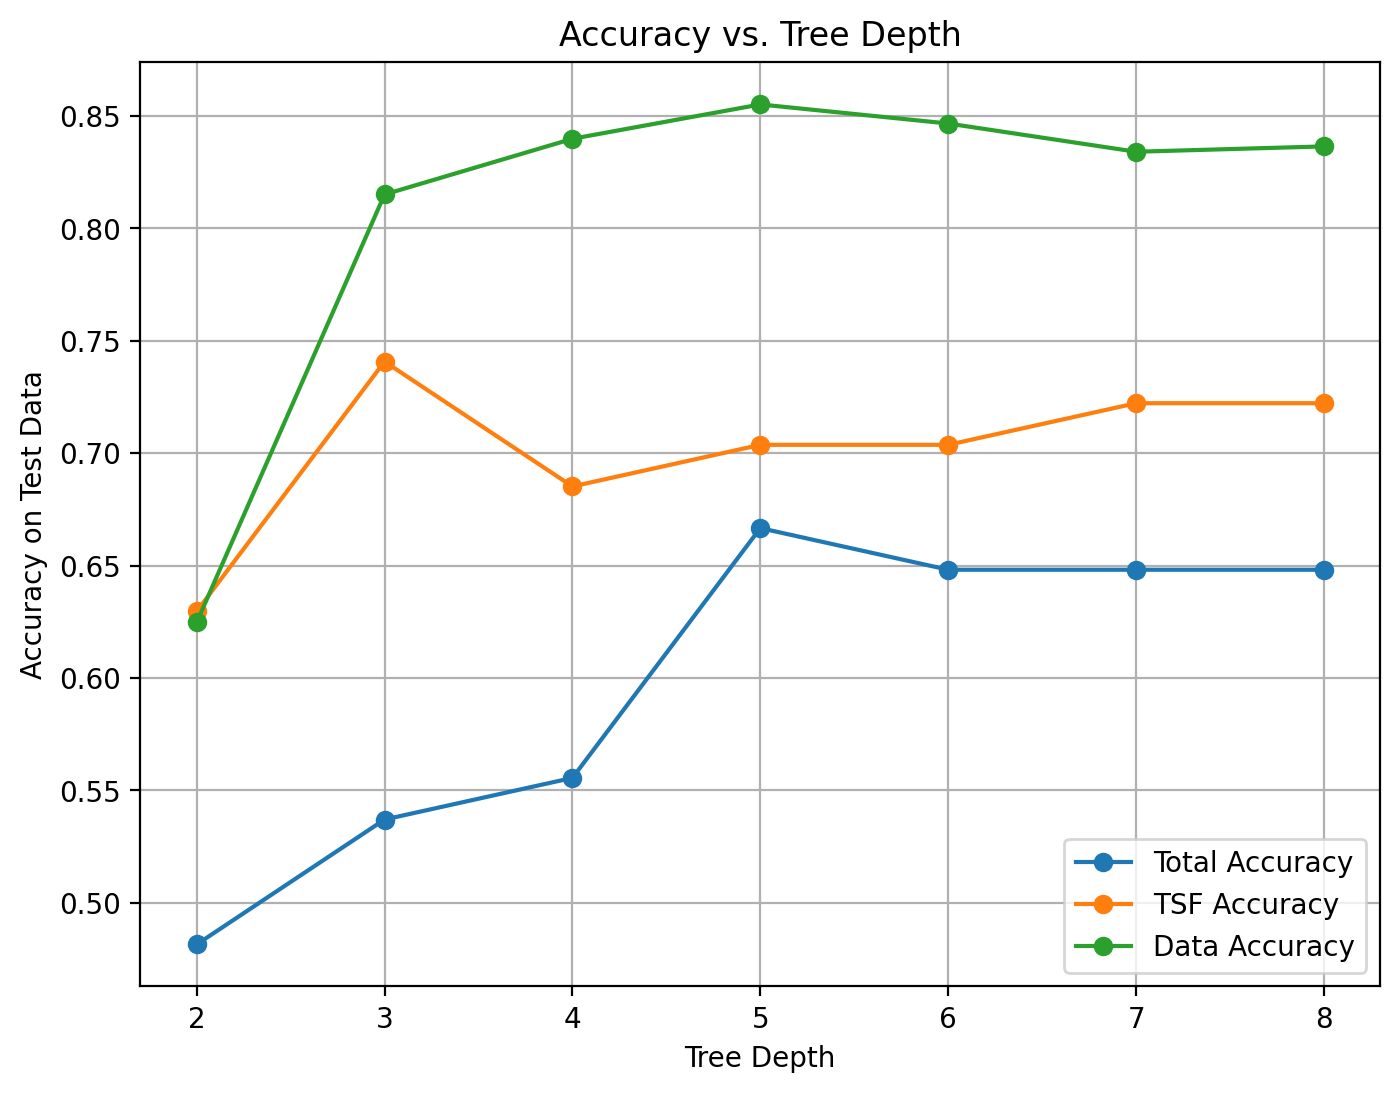

In [235]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = range(2, 9)
# creating lists for storing the accuracies at different depths for diffrent decision trees 
accuracies_total = []
accuracies_tsf = []
accuracies_data = []

# Iterate over depths from 2 to 8
for depth in depths:
    dt_1 = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0) 
    dt_2 = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0) 
    dt_3 = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    
    # Train the model
    dt_1.fit(acc_magnitude, y_train)
    dt_2.fit(X_tsf_train, y_train)
    dt_3.fit(X_data_feature_train, y_data_feature_train)
    
    # Predict on test data
    y_pred_total = dt_1.predict(acc_magnitude_test)
    y_pred_tsf=dt_2.predict(X_tsf_test)
    y_pred_data = dt_3.predict(X_data_feature_test)
    
    # Calculate accuracy
    accuracy_total = accuracy_score(y_test, y_pred_total)
    accuracies_total.append(accuracy_total)
    accuracy_tsf= accuracy_score(y_test, y_pred_tsf)
    accuracies_tsf.append(accuracy_tsf)
    accuracy_data = accuracy_score(y_data_feature_test, y_pred_data)
    accuracies_data.append(accuracy_data)
                                 
# Plotting  
plt.figure(figsize=(8, 6))
plt.plot(depths, accuracies_total, marker='o', label='Total Accuracy')
plt.plot(depths, accuracies_tsf, marker='o', label='TSF Accuracy')
plt.plot(depths, accuracies_data, marker='o', label='Data Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy on Test Data')
plt.xticks(depths)
plt.grid(True)
plt.legend()
plt.show()

### Q3

The first two model struggle with accurately classifying activities related to walking, particularly WALKING_UPSTAIRS and WALKING_DOWNSTAIRS. This is shown by the confusion matrices from the first two models, where these activities are often misclassified. The likely reason for this is the overlap in features between these similar activities, making it hard for the models to differentiate between them. Also these models wrongly predicts sitting as laying and vice-verca for a few times. This is likely because as both of them are static activities, so it becomes for model to predict in both cases.

On the other hand, the third model is getting confuse between sitiing and standing a lot of times. This is because both are static activities and The features derived from the data, might be similar for both sitting and standing, leading to similar feature vectors for both activities. This similarity makes it challenging for the model to differentiate between them.